#Email spam classification


In [2]:
#import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Load the data set and view the first and last 10 rows.

In [11]:
#load the dataset
df = pd.read_csv('emails.csv', index_col=[0])
#preview the first 10 rows
df.head(10)

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
Email No.,,,,,,,,,,,,,,,,,,,,,
Email 1,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Email 2,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
Email 3,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
Email 4,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
Email 5,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
Email 6,4,5,1,4,2,3,45,1,0,16,...,0,0,0,0,0,0,0,0,0,1
Email 7,5,3,1,3,2,1,37,0,0,9,...,0,0,0,0,0,0,0,0,0,0
Email 8,0,2,2,3,1,2,21,6,0,2,...,0,0,0,0,0,0,0,1,0,1
Email 9,2,2,3,0,0,1,18,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#preview the last 10 columns
df.tail(10)

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
Email No.,,,,,,,,,,,,,,,,,,,,,
Email 5163,2,3,1,2,1,2,32,0,0,7,...,0,0,0,0,0,0,0,0,0,1
Email 5164,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Email 5165,21,18,3,1,6,4,106,1,2,18,...,0,0,0,0,0,0,0,0,0,0
Email 5166,1,0,1,0,3,1,12,1,0,2,...,0,0,0,1,0,0,0,0,0,0
Email 5167,1,0,1,1,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Email 5168,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
Email 5169,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
Email 5170,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
Email 5171,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,1


In [13]:
#get the shape of the data set
df.shape 

(5172, 3001)

In [16]:
#get the data summary statistics
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


#Chhecking for null values

In [19]:
#check for null values 
#rows with null values in the whole data frame
null=df.isnull().any(axis=1)
null

Email No.
Email 1       False
Email 2       False
Email 3       False
Email 4       False
Email 5       False
              ...  
Email 5168    False
Email 5169    False
Email 5170    False
Email 5171    False
Email 5172    False
Length: 5172, dtype: bool

In [23]:
null_amount=0
for a in null:
    if a != False:
        null_amount+=1
print('There are ', null_amount, 'null values in the dataframe')

There are  0 null values in the dataframe


#visualizing the spam prediction

In [30]:
#extract the prediction data
predictions=df['Prediction'].value_counts()
predictions

0    3672
1    1500
Name: Prediction, dtype: int64

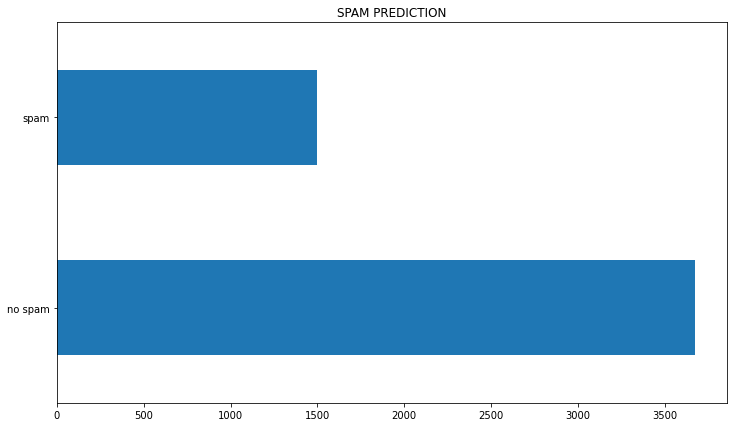

In [45]:
#define the plot size
plt.rcParams['figure.figsize'] = [12, 7]
#plot the data
predictions.plot.barh()
#define the tick parameters
plt.yticks([0,1], ['no spam', 'spam'])
#plot title
plt.title('SPAM PREDICTION')
plt.show()

In [47]:
spam_percent= (predictions[1]/np.sum(predictions))*100
spam_percent

29.00232018561485

From the analysis, it could be observed that 29.00232018561485% of the emails were spam.